In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
conda install -c anaconda patsy

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
# 수치해석, 벡터화 연산, 수학 기본 모든 연산

import scipy as sp
# 함수, 미적분, 통계적으로 전반적인 모든 연산을 도와주는 패키지

import pandas as pd
# 데이터 프레임 클래스 (R 자료형) 머신러닝 데이터 분석이 필수

import matplotlib as mpl
import matplotlib.pyplot as plt
# Matlab 그 장점을 파이썬에서 사용할 수 있게 만들어주는 패키지

import seaborn as sns
# matplotlib에서 지원하지 않는 고급 시각화 고급차트

import statsmodels.api as sm
# 회귀 분석, 선형 회귀, 시계열 분석 등등 분석 기능을 제공하는 패키지

import sklearn as sk
# 머신러닝, 지도학습, 비지도학습, 데이터 셋 기능들을 제공하는 패키지

import missingno as msno
# 데이터 전처리, 누락된 데이터를 찾고 시각화를 할 수 있는 패키지

import patsy
# 데이터 프레임을 다루는 기능

In [4]:
%%writefile sample.csv
x1,x2,x3,x4,x5
,a,0.1,철수,2022-11-24
,b,0.2,영희,
3,c,0.3,,2022-11-26
4,d,0.4,은희,2022-11-27
5,,0.5,지우,2022-11-28
6,f,0.6,이슬,2022-11-29

Overwriting sample.csv


In [5]:
df = pd.read_csv('sample.csv')

In [6]:
df.isnull().sum()

x1    2
x2    1
x3    0
x4    1
x5    1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4 non-null      float64
 1   x2      5 non-null      object 
 2   x3      6 non-null      float64
 3   x4      5 non-null      object 
 4   x5      5 non-null      object 
dtypes: float64(2), object(3)
memory usage: 368.0+ bytes


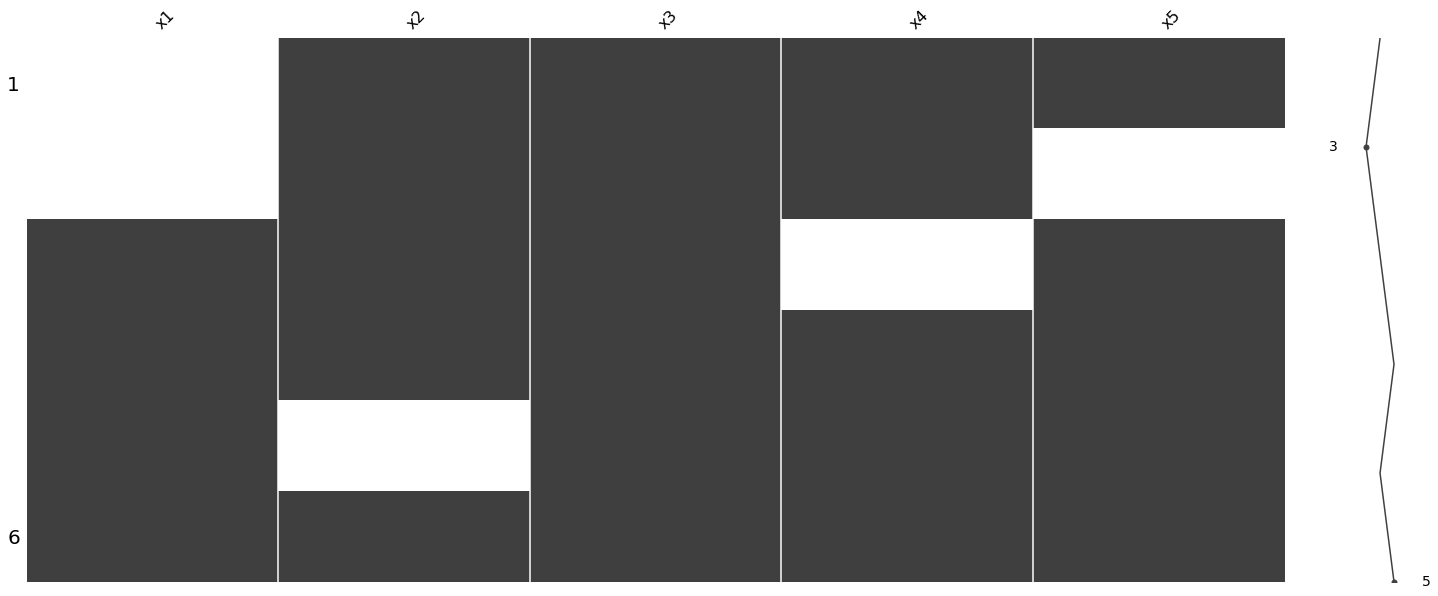

In [8]:
# msno를 이용하여 결측치 matrix 시각화
msno.matrix(df)
plt.show()

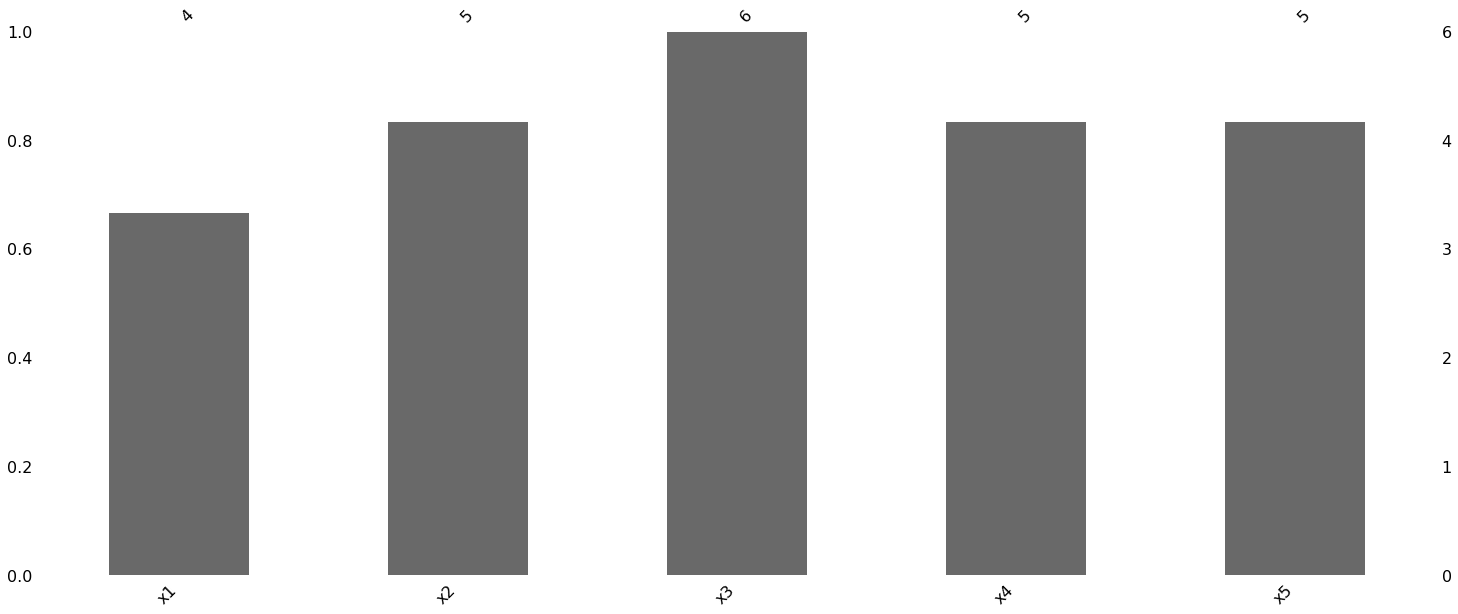

In [9]:
msno.bar(df)
plt.show()

In [10]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:>

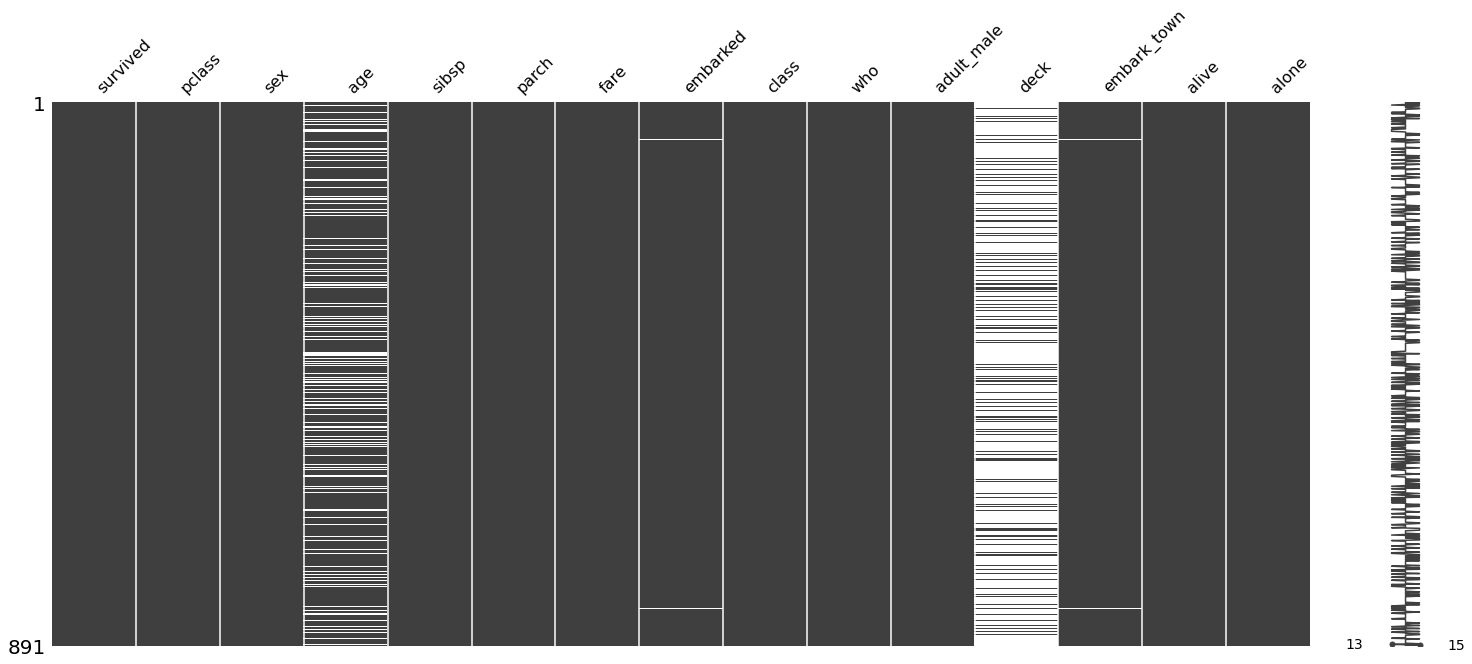

In [11]:
msno.matrix(titanic)

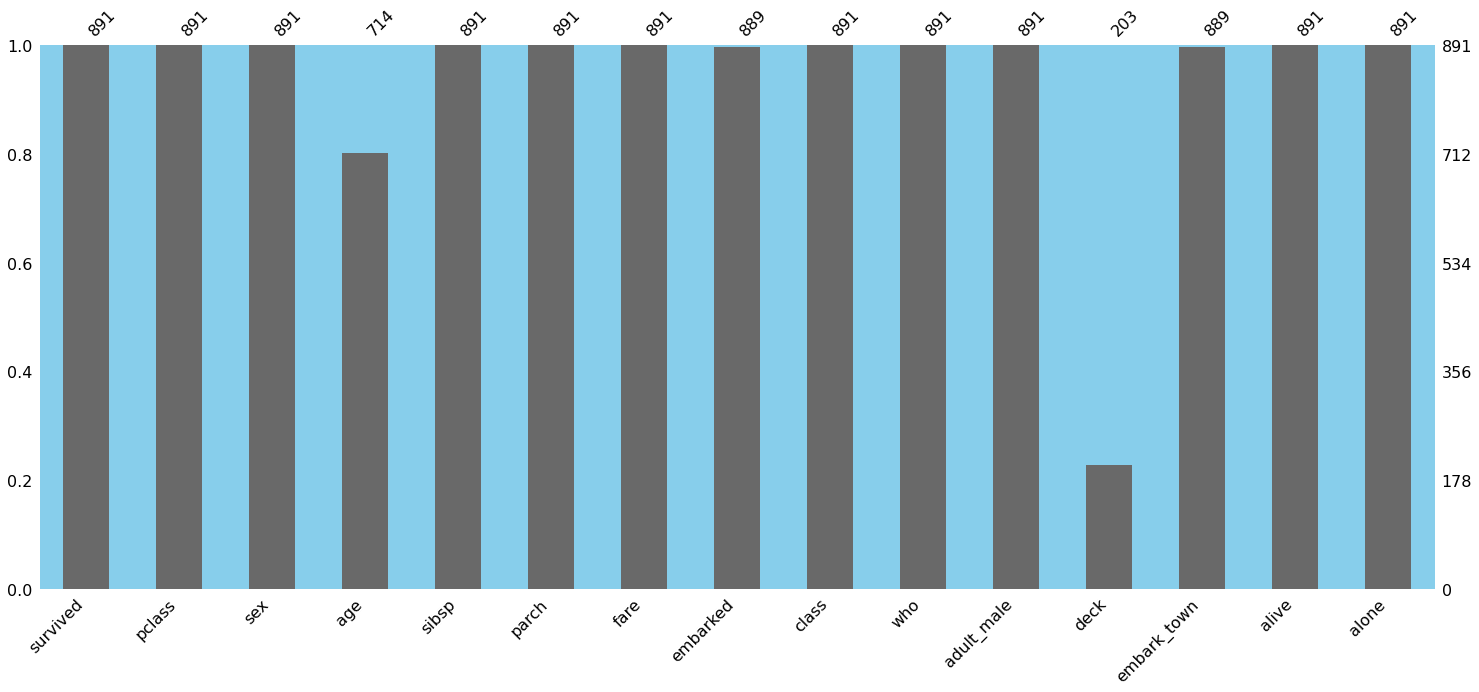

In [19]:
ax = msno.bar(titanic)
ax.patch.set_facecolor('skyblue')
plt.show()

In [13]:
titanic.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [14]:
titanic.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [15]:
titanic.dropna(thresh=10, axis=1)
# 원소가 10개이상인 컬럼만 남기기

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
from sklearn.impute import SimpleImputer
# 결측값을 채우는 메서드

In [22]:
titanic = sns.load_dataset('titanic')
titanic = pd.DataFrame(titanic)

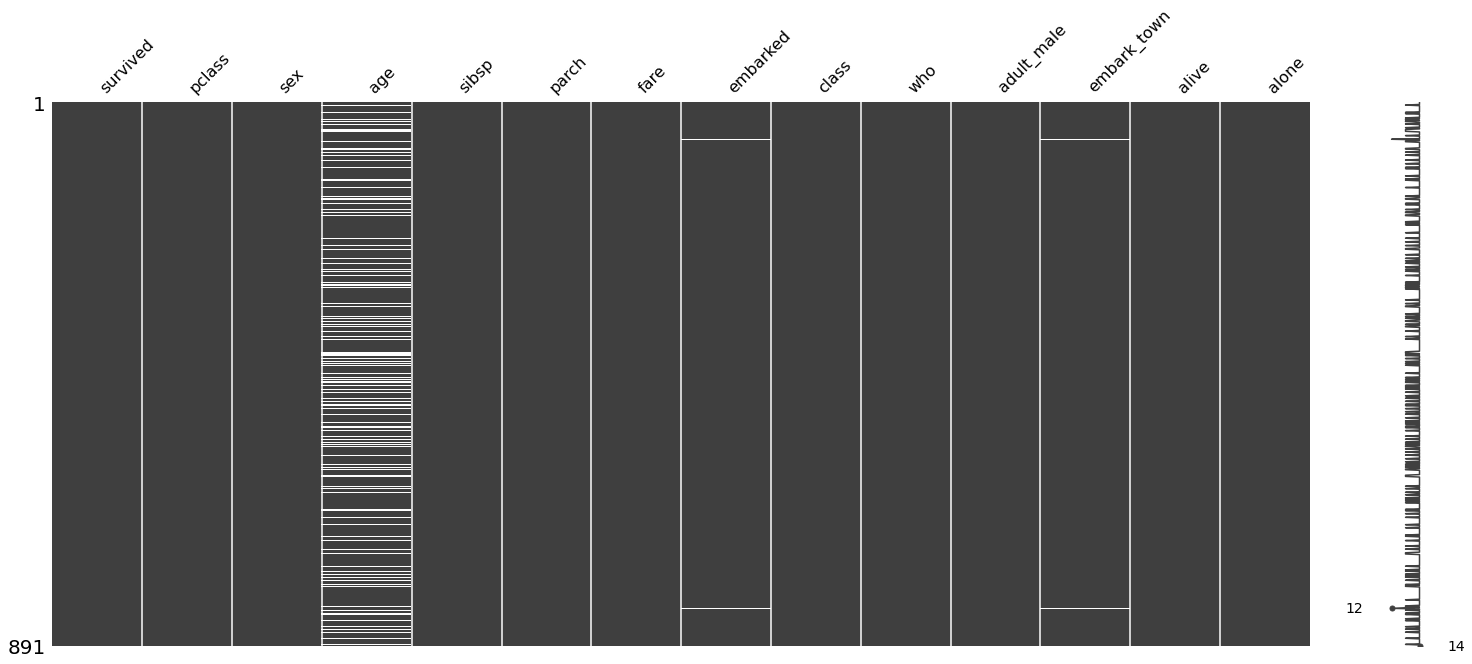

In [25]:
# 데이터가 절반 이상이 없는 열을 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)
plt.show()

In [39]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df


,x1,x2,x3,x4,x5
0,3.0,a,0.1,철수,2022-11-24
1,3.0,b,0.2,영희,2022-11-24
2,3.0,c,0.3,영희,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,a,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


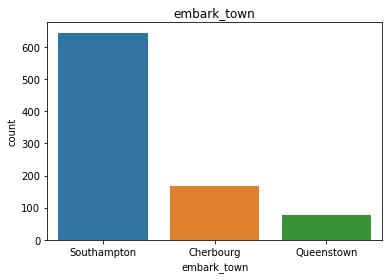

In [41]:
sns.countplot(titanic.embark_town)
plt.title('embark_town')
plt.show()

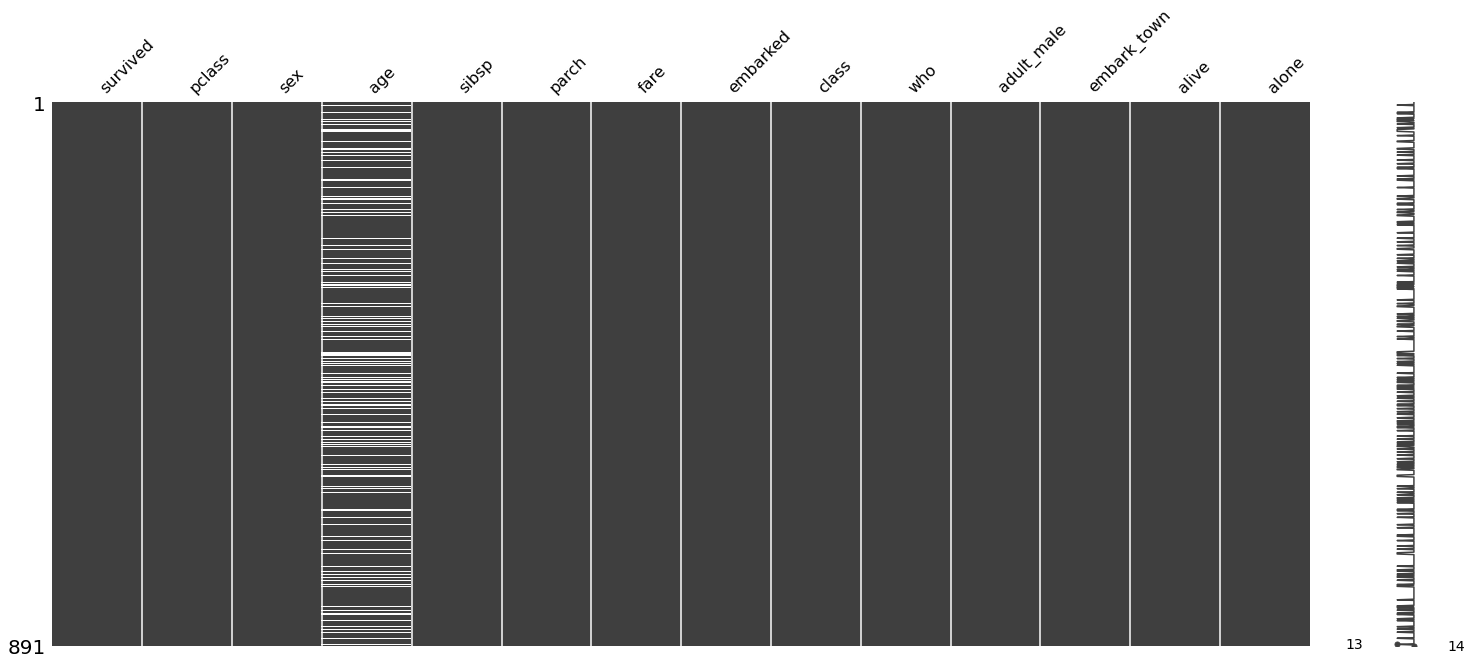

In [43]:
imputer_embark_town = SimpleImputer(strategy='most_frequent')
# 데이터프레임 형태로 열을 넣어야 작동하기 때문에 titanic[[열 이름]]으로 적용
titanic['embark_town'] = imputer_embark_town.fit_transform(titanic[['embark_town']])
titanic['embarked'] = imputer_embark_town.fit_transform(titanic[['embarked']])

msno.matrix(titanic)
plt.show()

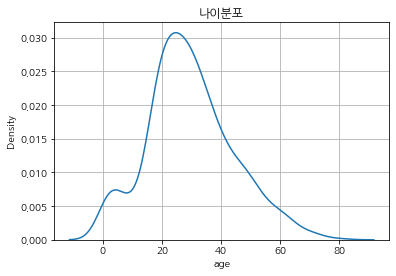

In [46]:
import koreanize_matplotlib
sns.kdeplot(titanic.age)
plt.title('나이분포')
plt.grid()
plt.show()

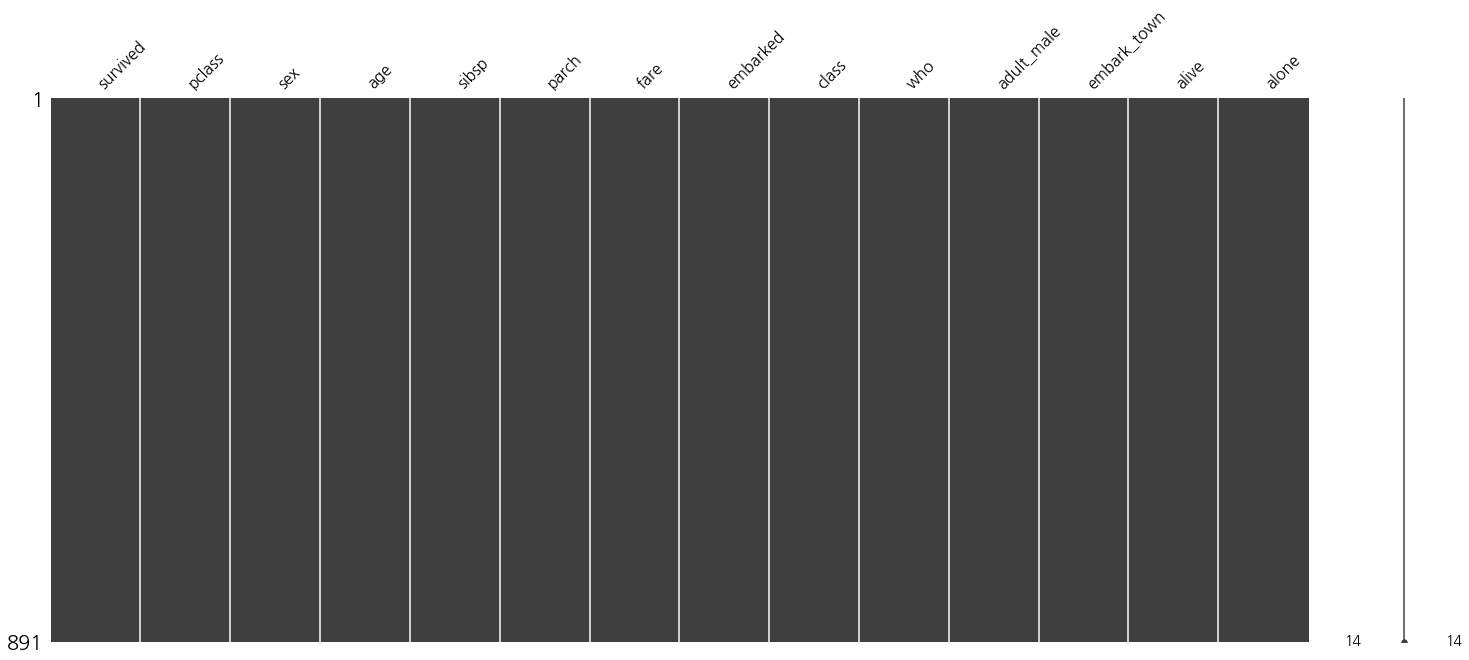

In [47]:
imputer_age = SimpleImputer(strategy='median')
titanic['age'] = imputer_age.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

#### 데이터 프레임 다루기

In [55]:
from patsy import demo_data
from patsy import dmatrix
df = pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [56]:
dmatrix('x1 + 0',data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [61]:
dmatrix('x1 + x2 + x3 + 0',data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [58]:
dmatrix('x1 + x2 + x3',data=df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [59]:
dmatrix('x1 + x2 + x3 + np.log(np.abs(x2))',data=df)

DesignMatrix with shape (5, 5)
  Intercept       x1        x2       x3  np.log(np.abs(x2))
          1  1.76405  -0.97728  0.14404            -0.02298
          1  0.40016   0.95009  1.45427            -0.05120
          1  0.97874  -0.15136  0.76104            -1.88811
          1  2.24089  -0.10322  0.12168            -2.27090
          1  1.86756   0.41060  0.44386            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)
    'np.log(np.abs(x2))' (column 4)

In [66]:
dmatrix('x1 + x2 + I(x3+x4) + 0',data=df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x3 + x4)
  1.76405  -0.97728     0.47772
  0.40016   0.95009     2.94835
  0.97874  -0.15136     0.55588
  2.24089  -0.10322     0.43474
  1.86756   0.41060    -0.41023
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x3 + x4)' (column 2)

In [68]:
dmatrix('center(x1) + 0',data=df) # 평균을 0으로 스케일링

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [69]:
dmatrix('standardize(x1)',data=df) # 평균을 0 , 표준편차를 1 으로 스케일링 (표준화)

DesignMatrix with shape (5, 2)
  Intercept  standardize(x1)
          1          0.47060
          1         -1.57500
          1         -0.70723
          1          1.18578
          1          0.62584
  Terms:
    'Intercept' (column 0)
    'standardize(x1)' (column 1)

#### Sklearn을 통해 데이터를 표준화 및 정규화

In [70]:
X = np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [73]:
X2 = np.vstack([X,[[10000]]])
X2

array([[    0],
       [    1],
       [    2],
       [    3],
       [    4],
       [    5],
       [    6],
       [10000]])

In [74]:
scaler.fit_transform(X2) # 이상값이 매우 큰경우 값이 이상해짐

array([[-0.3788718 ],
       [-0.37856934],
       [-0.37826687],
       [-0.37796441],
       [-0.37766195],
       [-0.37735949],
       [-0.37705703],
       [ 2.64575089]])

In [75]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
# 중앙값을 활용한 스케일러
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.85614286e+03]])

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(X)

array([[  0.,   0.,   0.],
       [  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  6.,  36., 216.]])

In [86]:
from sklearn.preprocessing import FunctionTransformer
# 함수를 적용해 변환시켜주는 전처리 메서드
X = 90*np.arange(6).reshape(-1,1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450]])

In [81]:
def sincos(X):
    x0 = np.sin(X*np.pi/180)
    x1 = np.cos(X*np.pi/180)
    X_new = np.hstack([x0,x1])
    return X_new
X2 = FunctionTransformer(sincos).fit_transform(X)
X2

array([[ 0.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  6.1232340e-17],
       [ 1.2246468e-16, -1.0000000e+00],
       [-1.0000000e+00, -1.8369702e-16],
       [-2.4492936e-16,  1.0000000e+00],
       [ 1.0000000e+00,  3.0616170e-16],
       [ 3.6739404e-16, -1.0000000e+00],
       [-1.0000000e+00, -4.2862638e-16],
       [-4.8985872e-16,  1.0000000e+00]])

In [79]:
plt.subplot()

array([[ 0.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  6.1232340e-17],
       [ 1.2246468e-16, -1.0000000e+00],
       [-1.0000000e+00, -1.8369702e-16],
       [-2.4492936e-16,  1.0000000e+00],
       [ 1.0000000e+00,  3.0616170e-16],
       [ 3.6739404e-16, -1.0000000e+00],
       [-1.0000000e+00, -4.2862638e-16],
       [-4.8985872e-16,  1.0000000e+00]])

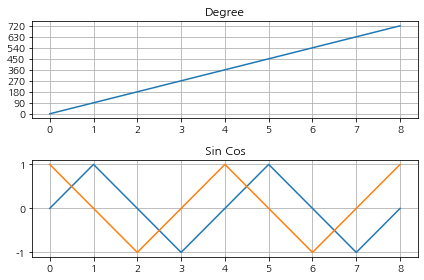

In [84]:
plt.subplot(211)
plt.plot(X)
plt.yticks(X.flatten())
plt.title('Degree')
plt.grid()
plt.subplot(212)
plt.plot(X2)
plt.title('Sin Cos')
plt.tight_layout()
plt.grid()
plt.show()